Link to Google Colab: https://colab.research.google.com/drive/1JHHEy713mG5keA-vVkVMVDCc8qHbKd0H

In [0]:
pip install -i https://test.pypi.org/simple/ icalgosocdemo==0.0.4

Looking in indexes: https://test.pypi.org/simple/


In [0]:
from icalgodemo.strategy import Strategy
from collections import deque 
import numpy as np

## Week 1: Momentum Trading Strategy: Moving Average Convergence Divergence (MACD)


### Rebalancing frequency and the impact on PnL 




Before smoothing the signal

In [0]:
class MyStrategy(Strategy):

    def before_trades(self):
      self.bidhist = deque(maxlen=1000)
      self.askhist = deque(maxlen=1000)
      self.midhist = deque(maxlen=1000)
      self.fast_length = 50
      self.slow_length = 400
      self.holdinghist = deque(maxlen=1000)
      return None 
    
    def ondata(self,bid,ask):

      self.bidhist.append(bid)
      self.askhist.append(ask)
      mid = (ask+bid)/2
      self.midhist.append(mid)
      fast_mean = np.array(self.midhist)[-self.fast_length:].mean()
      slow_mean = np.array(self.midhist)[-self.slow_length:].mean()

      if fast_mean >= slow_mean:
        signal = 1
      else:
        signal = -1
      self.holdinghist.append(signal)

      # warmup for history 
      if len(self.midhist)>=500:
        return signal
      else:
        return 0 


In [0]:
strat = MyStrategy()
strat.train()

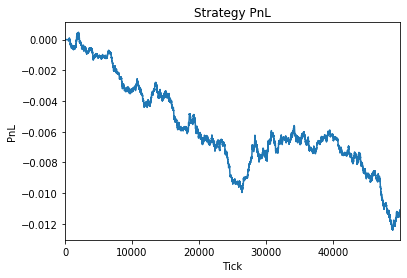

In [0]:
strat.plot_pnl()

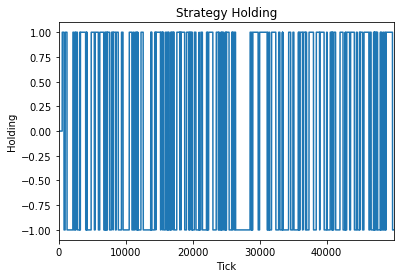

In [0]:
strat.plot_holding()

After smoothing the signal

In [0]:
class MyStrategy(Strategy):

    def before_trades(self):
      self.bidhist = deque(maxlen=1000)
      self.askhist = deque(maxlen=1000)
      self.midhist = deque(maxlen=1000)
      self.fast_length = 50
      self.slow_length = 400
      self.holdinghist = deque(maxlen=1000)
      return None 
    
    def ondata(self,bid,ask):
      self.bidhist.append(bid)
      self.askhist.append(ask)
      mid = (ask+bid)/2
      self.midhist.append(mid)
      fast_mean = np.array(self.midhist)[-self.fast_length:].mean()
      slow_mean = np.array(self.midhist)[-self.slow_length:].mean()
      
      if fast_mean >= slow_mean:
        signal = 1
      else:
        signal = -1
      self.holdinghist.append(signal)

      # warmup for history 
      if len(self.midhist)>=500:
        return np.array(self.holdinghist).mean()
      else:
        return 0 

    

In [0]:
strat = MyStrategy()
strat.train()

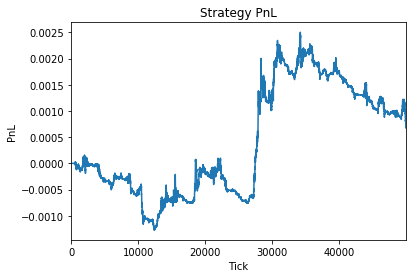

In [0]:
strat.plot_pnl()

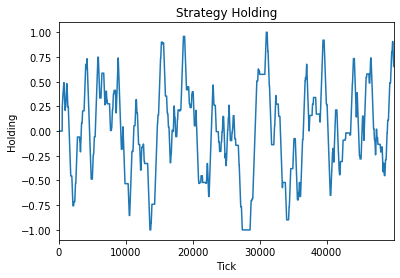

In [0]:
strat.plot_holding()

Question: Why using signals from technical indicators directly is not a good idea for trading? What are the other ways to smooth a trading signal? 